In [291]:
import pandas as pd
import numpy as np

In [292]:
from google.colab import drive

In [293]:
drive.mount('X_ray_data')

Drive already mounted at X_ray_data; to attempt to forcibly remount, call drive.mount("X_ray_data", force_remount=True).


In [294]:
# rm -r sample_data

In [295]:
!ls -la

total 14054564
drwxr-xr-x 1 root root      4096 Oct 14 01:52 .
drwxr-xr-x 1 root root      4096 Oct 13 23:47 ..
-rw-r--r-- 1 root root     89826 Oct 14 01:02 cam.jpg
drwxr-xr-x 4 root root      4096 Oct  8 13:44 .config
-rw-r--r-- 1 root root 287832664 Oct 13 23:54 model_epoch_01_loss_10.01_acc_0.25_val_acc_0.24_.h5
-rw-r--r-- 1 root root 287832800 Oct 14 01:08 model_epoch_01_loss_1.40_acc_0.26_val_acc_0.22_.h5
-rw-r--r-- 1 root root 287832800 Oct 14 00:18 model_epoch_01_loss_8.08_acc_0.23_val_acc_0.23_.h5
-rw-r--r-- 1 root root 287832800 Oct 14 01:08 model_epoch_02_loss_1.35_acc_0.33_val_acc_0.23_.h5
-rw-r--r-- 1 root root 287832800 Oct 14 00:19 model_epoch_02_loss_1.38_acc_0.26_val_acc_0.25_.h5
-rw-r--r-- 1 root root 287832664 Oct 13 23:57 model_epoch_02_loss_1.39_acc_0.24_val_acc_0.26_.h5
-rw-r--r-- 1 root root 287832800 Oct 14 01:09 model_epoch_03_loss_1.28_acc_0.37_val_acc_0.25_.h5
-rw-r--r-- 1 root root 287832664 Oct 13 23:58 model_epoch_03_loss_1.38_acc_0.28_val_acc_0.30_.h5
-rw

In [296]:
# !ls -la

In [297]:
# !unzip Dataset_4_classe_second_approach.zip
# !unzip /content/X_ray_data/MyDrive/X-ray_data/All_data_4_classes.zip

In [298]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import random

from tensorflow.keras import layers
from tensorflow.keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [299]:
path_data = '/content/X_ray_data/MyDrive/X-ray_data/Data_augmented_4_classes_train_test_val'

In [300]:
Train_NORMAL = os.listdir(path_data+'/Train/NORMAL/')
print('Train_NORMAL = ', len(Train_NORMAL))

Train_Pneumocystis = os.listdir(path_data+'/Train/Pneumocystis/')
print('Train_Pneumocystis = ', len(Train_Pneumocystis))

Train_Streptococcus = os.listdir(path_data+'/Train/Streptococcus/')
print('Train_Streptococcus = ', len(Train_Streptococcus))

Train_Covid = os.listdir(path_data+'/Train/COVID/')
print('Train_Covid = ', len(Train_Covid))

Train_NORMAL =  497
Train_Pneumocystis =  488
Train_Streptococcus =  475
Train_Covid =  465


In [301]:
Val_NORMAL = os.listdir(path_data+'/val/NORMAL/')
print('Val_NORMAL = ', len(Val_NORMAL))

Val_Pneumocystis = os.listdir(path_data+'/val/Pneumocystis/')
print('Val_Pneumocystis = ', len(Val_Pneumocystis))

Val_Streptococcus = os.listdir(path_data+'/val/Streptococcus/')
print('Val_Streptococcus = ', len(Val_Streptococcus))

Val_Covid = os.listdir(path_data+'/val/COVID/')
print('Val_Covid = ', len(Val_Covid))

Val_NORMAL =  138
Val_Pneumocystis =  129
Val_Streptococcus =  128
Val_Covid =  131


In [302]:
print('Images_names \n ', 
      Train_NORMAL[0], '\n' ,
      Train_Covid[0], '\n' ,
      Train_Pneumocystis[0], '\n' , 
      Train_Streptococcus[1])

Images_names 
  augmented_normal_0_4710.jpeg 
 augmented_covid_0_9378.jpeg 
 augmented_Pneumocystis_0_9383.jpeg 
 augmented_Streptococcus_0_2470.jpeg


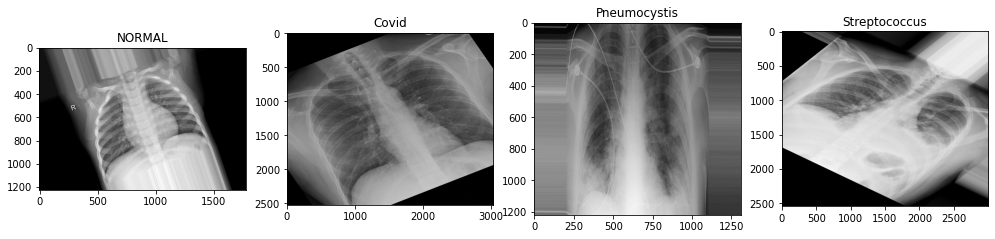

In [303]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc

img_name = Train_NORMAL[0]
img_normal = load_img(path_data+'/Train/NORMAL/' + img_name)

img_name_1 = Train_Covid[0]
img_Covid = load_img(path_data+'/Train/COVID/' + img_name_1)

img_name_2 = Train_Pneumocystis[0]
img_Pneumocystis = load_img(path_data+'/Train/Pneumocystis/' + img_name_2)

img_name_3 = Train_Streptococcus[1]
img_Streptococcus = load_img(path_data+'/Train/Streptococcus/' + img_name_3)



fig, axs = plt.subplots(1,4,figsize=(17,10))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")

axs[1].imshow(img_Covid)
axs[1].set_title("Covid");


axs[2].imshow(img_Pneumocystis)
axs[2].set_title("Pneumocystis")

axs[3].imshow(img_Streptococcus)
axs[3].set_title("Streptococcus");


# plt.savefig("../Assets/plot_01_assets_1_4classes_second_app.png")

In [304]:
model = Sequential()
activ = 'relu'

model.add(Conv2D(32, kernel_size=(3,3),
                 activation=activ,
                 input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(128, kernel_size=(3,3),
                 activation=activ,
                 activity_regularizer=regularizers.l2(1e-5)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(128, kernel_size=(3,3),
                 activation=activ,
                 activity_regularizer=regularizers.l2(1e-5)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
# model.add(Conv2D(128, kernel_size=(3,3),
#                  activation=activ))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(3,3),
#                  activation=activ))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))



# model.add(Conv2D(128, kernel_size=(3,3),
#                  activation=activ))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation=activ, 
                    activity_regularizer=regularizers.l2(1e-5)))

# model.add(Flatten())
# model.add(Dense(64, activation=activ, 
#                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
#                     bias_regularizer=regularizers.l2(1e-4),
#                     activity_regularizer=regularizers.l2(1e-5)))
# model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))


In [305]:
mtr_list = ['accuracy']

In [306]:
# opt = keras.optimizers.RMSprop(
#       learning_rate=0.001,
#       rho=0.9,
#       momentum=0.0,
#       epsilon=1e-07,
#       centered=False,
#       name="RMSprop")

In [307]:
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=opt, 
#               metrics=mtr_list)

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy", #binary_crossentropy
    metrics=["accuracy"],
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 128)      

Data was augmented before. Therefore I just apply rescaling function.

In [308]:
# train_datagen = image.ImageDataGenerator(
#                 featurewise_center=False, samplewise_center=False,
#                 featurewise_std_normalization=False, samplewise_std_normalization=False,
#                 zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
#                 height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
#                 channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
#                 horizontal_flip=True, vertical_flip=False, rescale=1./255,
#                 preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

In [309]:
train_datagen = image.ImageDataGenerator(rescale=1./255)

In [310]:
val_dataset = image.ImageDataGenerator(rescale=1./255)

In [311]:
train_generator = train_datagen.flow_from_directory(
                    directory=path_data+'/Train/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=128,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 1925 images belonging to 4 classes.


In [312]:
train_generator.class_indices

{'COVID': 0, 'NORMAL': 1, 'Pneumocystis': 2, 'Streptococcus': 3}

In [313]:
validation_generator = val_dataset.flow_from_directory(
                    directory=path_data+'/val/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=128,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 526 images belonging to 4 classes.


In [314]:
classes = pd.DataFrame(train_generator.classes)
classes[0].value_counts(normalize=True)

1    0.258182
2    0.253506
3    0.246753
0    0.241558
Name: 0, dtype: float64

In [315]:
save_filepath = "model_epoch_{epoch:02d}_loss_{loss:.2f}_acc_{accuracy:.2f}_val_acc_{val_accuracy:.2f}_.h5"
checkpoint = ModelCheckpoint(save_filepath, 
                             monitor='val_accuracy', 
                             verbose=1,
                             save_best_only=True, 
                             mode='max', 
                             period=1)

Check out the GPU type.

In [316]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Oct 14 02:23:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    37W / 250W |  15983MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [317]:
# %%time
model_history = model.fit_generator(generator=train_generator, 
                                    steps_per_epoch=8, 
                                    epochs=40, 
                                    verbose=1, 
                                    validation_data= validation_generator, 
                                    validation_steps=2, 
                                    class_weight=None, 
                                    max_queue_size=10, 
                                    workers=1, 
                                    use_multiprocessing=False,
                                    shuffle=True, 
                                    initial_epoch=0,
                                    callbacks=[checkpoint])

Epoch 1/40
8/8 [==============================] - 47s 6s/step - loss: 2.7855 - accuracy: 0.2598 - val_loss: 1.3890 - val_accuracy: 0.2344

Epoch 00001: val_accuracy improved from -inf to 0.23438, saving model to model_epoch_01_loss_2.79_acc_0.26_val_acc_0.23_.h5
Epoch 2/40
8/8 [==============================] - 40s 5s/step - loss: 1.3934 - accuracy: 0.2397 - val_loss: 1.3889 - val_accuracy: 0.2539

Epoch 00002: val_accuracy improved from 0.23438 to 0.25391, saving model to model_epoch_02_loss_1.39_acc_0.24_val_acc_0.25_.h5
Epoch 3/40
8/8 [==============================] - 39s 5s/step - loss: 1.3903 - accuracy: 0.2353 - val_loss: 1.3867 - val_accuracy: 0.2578

Epoch 00003: val_accuracy improved from 0.25391 to 0.25781, saving model to model_epoch_03_loss_1.39_acc_0.24_val_acc_0.26_.h5
Epoch 4/40
8/8 [==============================] - 42s 5s/step - loss: 1.3870 - accuracy: 0.2617 - val_loss: 1.3865 - val_accuracy: 0.2734

Epoch 00004: val_accuracy improved from 0.25781 to 0.27344, saving

len(model_history.history.keys()) 
 4 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


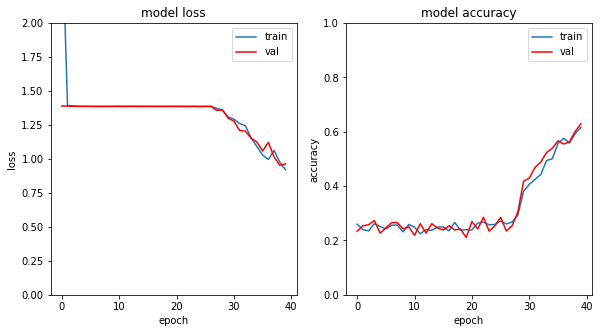

In [318]:
# list all data in history
print('len(model_history.history.keys()) \n', len(model_history.history.keys()),'\n')
print(model_history.history.keys())


model_history_df = pd.DataFrame(model_history.history)
model_history_df


model_history_df.columns


plt.figure(figsize=(15,17))
# columns = ['loss', 'accuracy', 'mse', 'auc', 'true_positives', 'true_negatives',
#            'false_positives', 'false_negatives']
columns = ['loss', 'accuracy']
# columns = ['loss', 'acc']
for i,col in enumerate(columns):
    
    plt.subplot(3, 3, i+1)
    
    plt.plot(model_history_df[col])
    plt.ylim(0,2-i)
    plt.plot(model_history_df['val_'+col], color='red')
    plt.title('model '+col)
    # plt.ylim(0,)
    plt.ylabel(col)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
plt.savefig("plot_01_1_4classes_balanced_second_app.png")
# plt.savefig("../Figures/plot_01_1_4classes.png")

Predict using saved model

In [319]:
# path_1 = '/content/model_epoch_31_loss_0.24_acc_0.92_val_acc_0.84_.h5'
# model = keras.models.load_model(path_1)

# path_data = '/content/X_ray_data/MyDrive/X-ray_data/Data_augmented_4_classes_train_test_val'

In [320]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 128)      

In [321]:
# path_1 = '/content/model_epoch_46_loss_0.43_acc_0.98_val_acc_0.91_.h5'
# /content/X_ray_data/MyDrive/X-ray_data/model_epoch_14_loss_0.46_acc_0.54_val_acc_0.64_.h5
# model = keras.models.load_model(path_1)

path_data = '/content/X_ray_data/MyDrive/X-ray_data/Data_augmented_4_classes_train_test_val'

In [322]:
# DoubleCheck_datagen = image.ImageDataGenerator(
#                 featurewise_center=False, samplewise_center=False,
#                 featurewise_std_normalization=False, samplewise_std_normalization=False,
#                 zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
#                 height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
#                 channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
#                 horizontal_flip=True, vertical_flip=False, rescale=1./255,
#                 preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

DoubleCheck_datagen = image.ImageDataGenerator(rescale=1./255)
DoubleCheck_generator = DoubleCheck_datagen.flow_from_directory(
                    directory=path_data+'/Test/',
                    # directory='../Dataset_4_classe_second_approach/Train/',
#                     directory='../Codes/Models/Test_Data_Set_Sec_app/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=128,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")


model.evaluate(DoubleCheck_generator)

Found 529 images belonging to 4 classes.
5/5 [==============================] - 15s 3s/step - loss: 0.9130 - accuracy: 0.6560


[0.9129852652549744, 0.6559546589851379]

In [323]:
# est = model.predict_generator(DoubleCheck_generator)
# plt.plot(est)

{'Covid': 0, 'NORMAL': 1, 'Pneumocystis': 2, 'Streptococcus': 3}

In [324]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

{'Covid': 0, 'NORMAL': 1, 'Pneumocystis': 2, 'Streptococcus': 3}

In [325]:
Normal_img_list = os.listdir(path_data+'/Test/NORMAL/')
Normal_img_list = [i for i in Normal_img_list if i !='.DS_Store']

# plt.figure(figsize=(20, 10))


estimations_for_normal_data = []
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Normal_img_list):
    path_to_img = path_data+'/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    # ax = plt.subplot(1, 7, i+1)
    # plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction[0])
    estimations_for_normal_data.append(prediction[0])

<Figure size 1440x720 with 0 Axes>

Confusion matrix

In [326]:
COVID_img_list = os.listdir(path_data+'/Test/COVID/')
COVID_img_list = [i for i in COVID_img_list if i !='.DS_Store']

# plt.figure(figsize=(20, 10))


estimations_for_COVID_data = []
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(COVID_img_list):
    path_to_img = path_data+'/Test/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    # ax = plt.subplot(1, 7, i+1)
    # plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction[0])
    estimations_for_COVID_data.append(prediction[0])

<Figure size 1440x720 with 0 Axes>

In [327]:
Pneumocystis_img_list = os.listdir(path_data+'/Test/Pneumocystis/')
Pneumocystis_img_list = [i for i in Pneumocystis_img_list if i !='.DS_Store']

# plt.figure(figsize=(20, 10))


estimations_for_Pneumocystis_data = []
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Pneumocystis_img_list):
    path_to_img = path_data+'/Test/Pneumocystis/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    # ax = plt.subplot(1, 7, i+1)
    # plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction[0])
    estimations_for_Pneumocystis_data.append(prediction[0])

<Figure size 1440x720 with 0 Axes>

In [328]:
Streptococcus_img_list = os.listdir(path_data+'/Test/Streptococcus/')
Streptococcus_img_list = [i for i in Streptococcus_img_list if i !='.DS_Store']

# plt.figure(figsize=(20, 10))


estimations_for_Streptococcus_data = []
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Streptococcus_img_list):
    path_to_img = path_data+'/Test/Streptococcus/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    # ax = plt.subplot(1, 7, i+1)
    # plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction[0])
    estimations_for_Streptococcus_data.append(prediction[0])

<Figure size 1440x720 with 0 Axes>

In [329]:
estimations_for_COVID_data
estimations_for_normal_data
estimations_for_Pneumocystis_data
estimations_for_Streptococcus_data


values, counts_COVID = np.unique(estimations_for_COVID_data, return_counts=True)
values, counts_normal = np.unique(estimations_for_normal_data, return_counts=True)
values, counts_Pneumocystis = np.unique(estimations_for_Pneumocystis_data, return_counts=True)
values, counts_Streptococcus = np.unique(estimations_for_Streptococcus_data, return_counts=True)

print(counts_COVID)
print(counts_normal)
print(counts_Pneumocystis)
print(counts_Streptococcus)

[57 22 28 28]
[120  12]
[ 9 43 65 15]
[16 18 23 73]


<Figure size 1440x720 with 0 Axes>

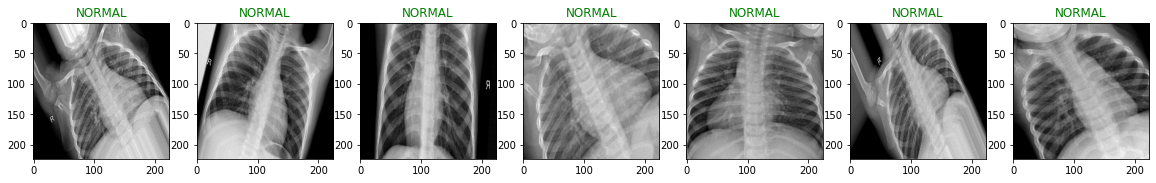

In [330]:
Normal_img_list = os.listdir(path_data+'/Test/NORMAL/')
Normal_img_list = [i for i in Normal_img_list if i !='.DS_Store']

plt.figure(figsize=(20, 10))

# for i, img in enumerate(Normal_img_list[0:7]):
#     path_to_img = path_data+'/Test//NORMAL/'+str(img)
#     img = load_img(path_to_img, target_size=(224, 224))
#     ax = plt.subplot(1, 7, i+1)
#     plt.imshow(img)
#     plt.title("NORMAL")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Normal_img_list[0:7]):
    path_to_img = path_data+'/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)
    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='g')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')

plt.savefig("/content/X_ray_data/MyDrive/X-ray_data/plot_4C_Normal.png")

<Figure size 1440x720 with 0 Axes>

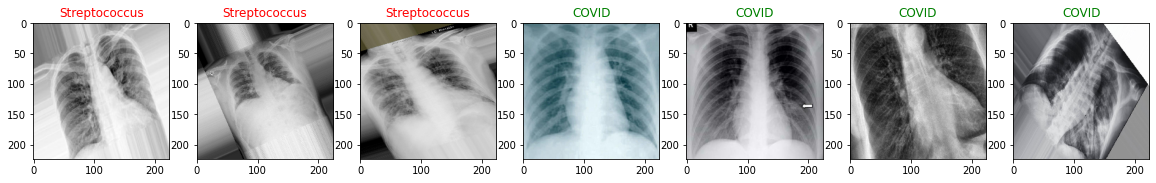

In [331]:
COVID_img_list = os.listdir(path_data+'/Test/COVID/')
COVID_img_list = [i for i in COVID_img_list if i !='.DS_Store']

# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(20, 10))
   
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(COVID_img_list[0:7]):
    path_to_img = path_data+'/Test/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)

    if prediction==0:
        plt.title("COVID", color='g')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')
plt.savefig("/content/X_ray_data/MyDrive/X-ray_data/plot_4C_COVID.png")

<Figure size 1440x720 with 0 Axes>

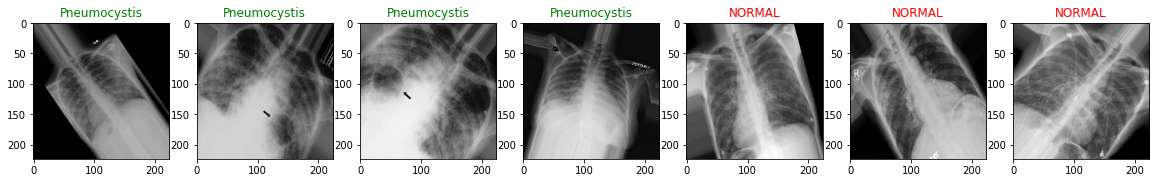

In [332]:
Pneumocystis_img_list = os.listdir(path_data+'/Test/Pneumocystis/')
Pneumocystis_img_list = [i for i in Pneumocystis_img_list if i !='.DS_Store']

# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(20, 10))

# for i, img in enumerate(Pneumocystis_img_list[0:7]):
#     path_to_img = path_data+'/Test/Pneumocystis/'+str(img)
#     img = load_img(path_to_img, target_size=(224, 224))
#     ax = plt.subplot(1, 7, i+1)
#     plt.imshow(img)
#     plt.title("Pneumocystis")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Pneumocystis_img_list[0:7]):
    path_to_img = path_data+'/Test/Pneumocystis/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)


    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='g')
    else:
        plt.title("Streptococcus", color='r')

plt.savefig("/content/X_ray_data/MyDrive/X-ray_data/plot_4C_Pneumocystis.png")

<Figure size 1440x720 with 0 Axes>

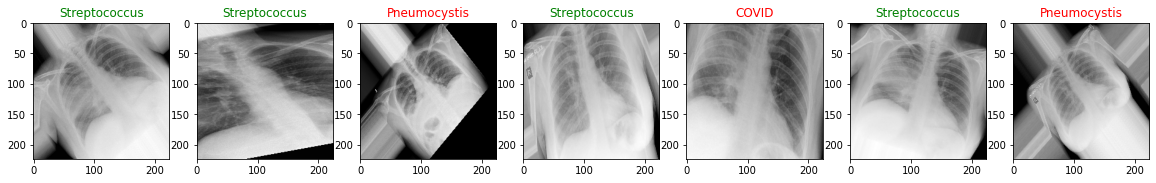

In [333]:
Streptococcus_img_list = os.listdir(path_data+'/Test/Streptococcus/')
Streptococcus_img_list = [i for i in Streptococcus_img_list if i !='.DS_Store']

# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(20, 10))

# for i, img in enumerate(Streptococcus_img_list[0:7]):
#     path_to_img = path_data+'/Test/Streptococcus/'+str(img)
#     img = load_img(path_to_img, target_size=(224, 224))
#     ax = plt.subplot(1, 7, i+1)
#     plt.imshow(img)
#     plt.title("Streptococcus")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Streptococcus_img_list[0:7]):
    path_to_img = path_data+'/Test/Streptococcus/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)


    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='g')
plt.savefig("/content/X_ray_data/MyDrive/X-ray_data/plot_4C_Streptococcus.png")

Data before augmentation

In [334]:
path_data = '/content/X_ray_data/MyDrive/X-ray_data/Data_4_before_aug'

In [335]:
imgname="IM-0115-0001.jpeg"

In [336]:
Normal_img_list[0]

'augmented_normal_0_9565.jpeg'

IM-0487-0001.jpeg
IM-0387-0001.jpeg
IM-0367-0001.jpeg
IM-0519-0001.jpeg
IM-0626-0001-0001.jpeg
IM-0560-0001.jpeg
IM-0226-0001.jpeg
IM-0448-0001.jpeg
IM-0302-0001.jpeg
IM-0472-0001.jpeg
IM-0266-0001.jpeg
IM-0384-0001.jpeg
IM-0519-0001-0001.jpeg
IM-0593-0001.jpeg
IM-0131-0001.jpeg
IM-0612-0001.jpeg
IM-0501-0001.jpeg
IM-0502-0001.jpeg
IM-0533-0001-0002.jpeg
IM-0323-0001.jpeg
IM-0540-0001.jpeg
IM-0596-0001.jpeg
IM-0451-0001.jpeg
IM-0516-0001.jpeg
IM-0205-0001.jpeg
IM-0329-0001.jpeg
IM-0185-0001.jpeg
IM-0339-0001.jpeg
IM-0210-0001.jpeg
IM-0483-0001.jpeg
IM-0475-0001.jpeg
IM-0115-0001.jpeg
IM-0605-0001.jpeg
IM-0533-0001-0001.jpeg
IM-0223-0001.jpeg
IM-0504-0001.jpeg
IM-0608-0001.jpeg
IM-0435-0001-0001.jpeg
IM-0549-0001-0001.jpeg
IM-0542-0001.jpeg
IM-0317-0001.jpeg
IM-0309-0001.jpeg
IM-0245-0001.jpeg
IM-0368-0001.jpeg
IM-0442-0001.jpeg
IM-0255-0001.jpeg
IM-0432-0001.jpeg
IM-0325-0001.jpeg
IM-0156-0001.jpeg
IM-0433-0001.jpeg
IM-0137-0001.jpeg
IM-0612-0001-0001.jpeg
IM-0177-0001.jpeg
IM-0539-000

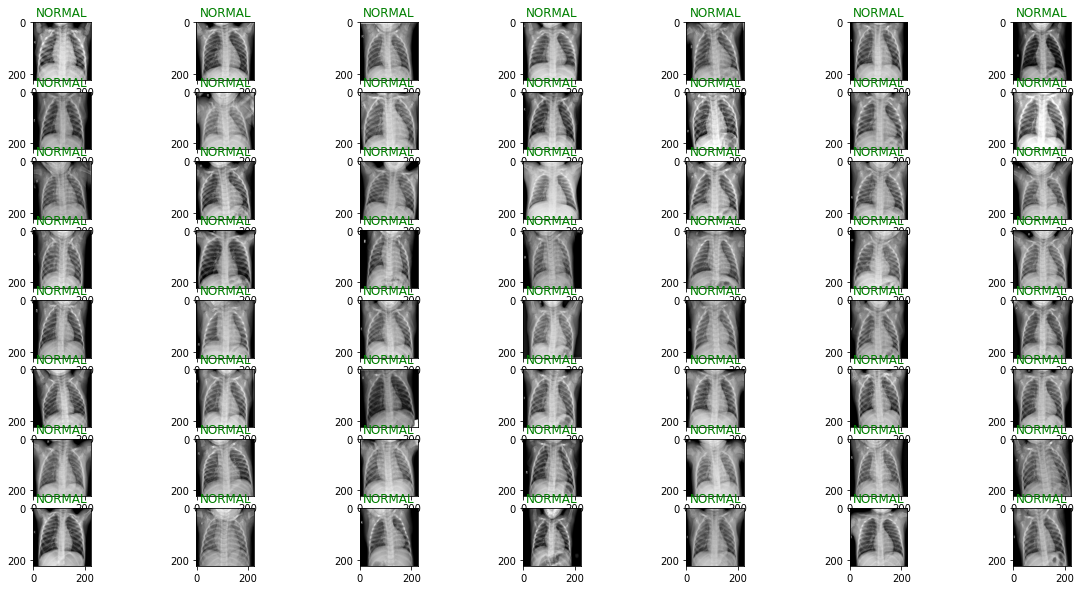

In [337]:
Normal_img_list = os.listdir(path_data+'/NORMAL/')
Normal_img_list = [i for i in Normal_img_list if i !='.DS_Store']

strr=0
endd=56

plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Normal_img_list[0:endd]):
    path_to_img = path_data+'/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(endd/7, 7, i+1)
    imgage_name = Normal_img_list[i]
    # print(str(img))
    # ax.title(j)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)
    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='g')
        print(str(imgage_name))
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')

figure1-5e75d0940b71e1b702629659-98-right.jpeg
5f619d7e.jpg
covid-19-caso-70-1-PA.jpg
ryct.2020200034.fig5-day0.jpeg
covid-19-pneumonia-mild.JPG
4d98e1de.jpg
nCoV-radiol.2020200269.fig1-day7.jpeg
covid-19-pneumonia-53.jpg
82a78c13.jpg
10.1016-slash-j.crad.2020.04.002-b.png
8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg
2-chest-filmc.jpg
23E99E2E-447C-46E5-8EB2-D35D12473C39.png
1-s2.0-S1684118220300682-main.pdf-003-b1.png
1-s2.0-S2387020620301959-gr4_lrg-c.png
kjr-21-e25-g001-l-a.jpg
covid-19-pneumonia-35-1.jpg
f6575117.jpg
7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
covid-19-pneumonia-30-PA.jpg
7afaaccc.jpg
AR-2.jpg
covid-19-pneumonia-44-day-0.jpeg
auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
paving.jpg
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png
all14238-fig-0001-m-b.jpg
extubation-1.jpg
58cb9263f16e94305c730685358e4e_jumbo.jpeg
bb0e626a.jpg
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png
c601f50d.jpg
12941_2020_358_Fig1_HTML.jpg
covid-

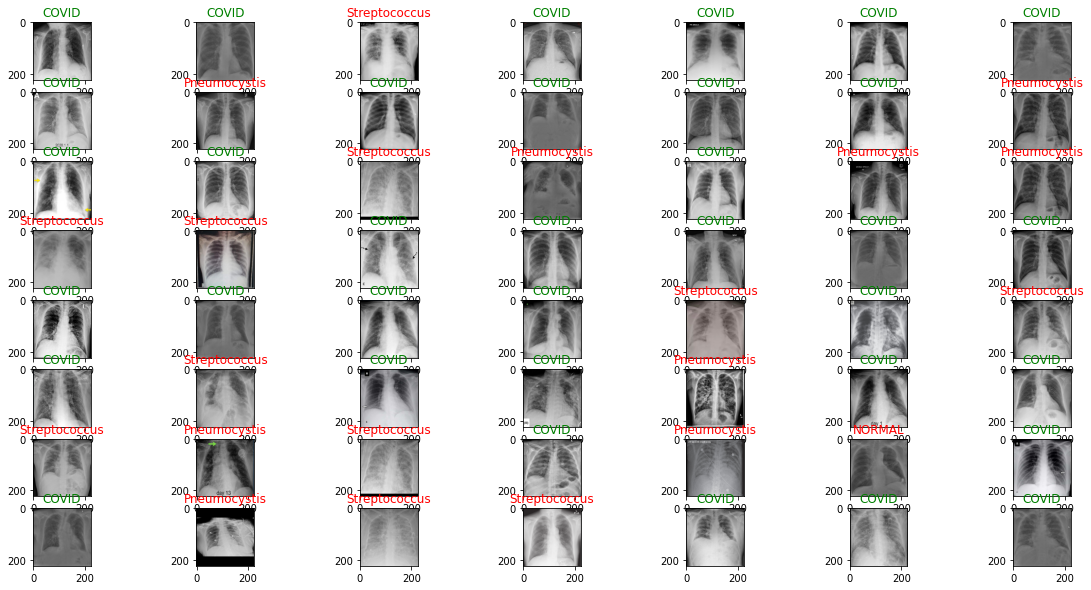

In [338]:
COVID_img_list = os.listdir(path_data+'/COVID/')
COVID_img_list = [i for i in COVID_img_list if i !='.DS_Store']

strr=0
endd=56

plt.figure(figsize=(20, 10)) 
for i, img in enumerate(COVID_img_list[0:endd]):
    path_to_img = path_data+'/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(endd/7, 7, i+1)
    imgage_name = COVID_img_list[i]
    # print(str(img))
    # ax.title(j)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)
    if prediction==0:
        plt.title("COVID", color='g')
        print(str(imgage_name))
    elif prediction==1:
        plt.title("NORMAL", color='r')
        
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')

pneumocystis-jiroveci-pneumonia-2.png
26eecee1e498237cc3ea3274b79ff0_jumbo.jpg
000003-6.jpg
000001-1.png
000001-8.jpg
000002-5.jpg
X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg
946b48f8564d681eb8950ea8a659e0_jumbo-1.jpeg
pneumocystis-jirovecii-pneumonia-3-2.jpg
pneumocystis-jirovecii-pneumonia-3-1.jpg
pneumocystis-jiroveci-pneumonia-4-PA.png
pneumocystis-jirovecii-pneumonia-3-3.jpg
pneumocystis-pneumonia-1.jpg


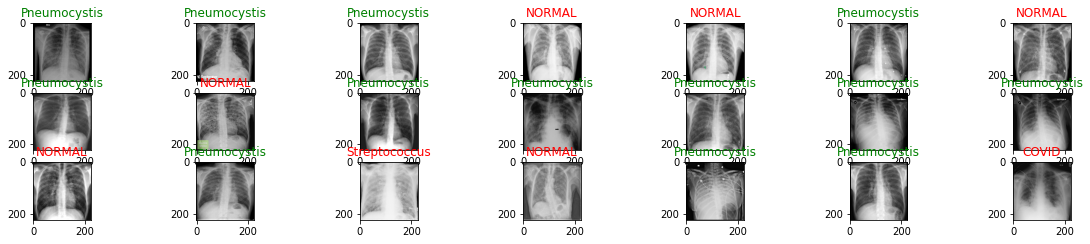

In [339]:
Pneumocystis_img_list = os.listdir(path_data+'/Pneumocystis/')
Pneumocystis_img_list = [i for i in Pneumocystis_img_list if i !='.DS_Store']

strr=0
endd=56

plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Pneumocystis_img_list[0:endd]):
    path_to_img = path_data+'/Pneumocystis/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(endd/7, 7, i+1)
    imgage_name = Pneumocystis_img_list[i]
    # print(str(img))
    # ax.title(j)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)
    if prediction==0:
        plt.title("COVID", color='r')
        
    elif prediction==1:
        plt.title("NORMAL", color='r')
        
    elif prediction==2:
        plt.title("Pneumocystis", color='g')
        print(str(imgage_name))
    else:
        plt.title("Streptococcus", color='r')

pneumococcal-pneumonia-day0.jpg
2fc8a7c61c76f13ee7f9306b44e792_jumbo.jpg
000004.png
92d755fba55c3305419b5cac83fbf5_jumbo.jpg
parapneumonic-effusion-1-PA.png
cavitating-pneumonia-4-day0-PA.jpg
pneumococcal-pneumonia-day35.jpg
streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg
pneumococcal-pneumonia-day7.jpg
3e9d9c9b02b9bcd81c851134667e76_jumbo.jpg
cavitating-pneumonia-4-day28-PA.png


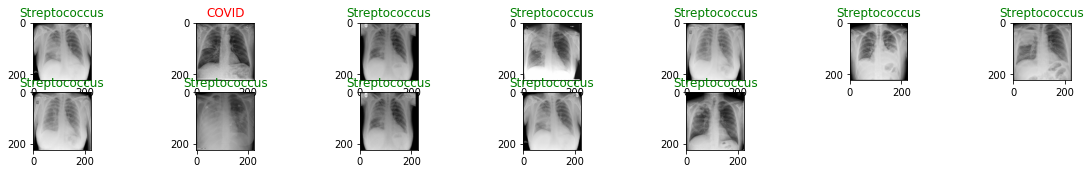

In [340]:
Streptococcus_img_list = os.listdir(path_data+'/Streptococcus/')
Streptococcus_img_list = [i for i in Streptococcus_img_list if i !='.DS_Store']

strr=0
endd=56

plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Streptococcus_img_list[0:endd]):
    path_to_img = path_data+'/Streptococcus/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(endd/7, 7, i+1)
    imgage_name = Streptococcus_img_list[i]
    # print(str(img))
    # ax.title(j)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)
    if prediction==0:
        plt.title("COVID", color='r')
        
    elif prediction==1:
        plt.title("NORMAL", color='r')
        
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
        
    else:
        plt.title("Streptococcus", color='g')
        print(str(imgage_name))

# Grad Cam, Keras 

In [341]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

You can change these to another model.

To get the values for last_conv_layer_name use model.summary() to see the names of all layers in the model.

In [342]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 128)      

In [343]:
for idx in range(len(model.layers)):
  print(model.get_layer(index = idx).name)

conv2d_9
conv2d_10
max_pooling2d_6
dropout_6
conv2d_11
max_pooling2d_7
dropout_7
conv2d_12
max_pooling2d_8
dropout_8
flatten_3
dense_6
dense_7


In [344]:
# Normal_img_list = os.listdir(path_data+'/Test/NORMAL/')
# Normal_img_list = [i for i in Normal_img_list if i !='.DS_Store']

# # print(Normal_img_list)
# img_normal_local_1 = "augmented_normal_0_9565.jpeg"
# # path_to_img = path_data+'/Test/NORMAL/'+str(img)
# # print(path_to_img)

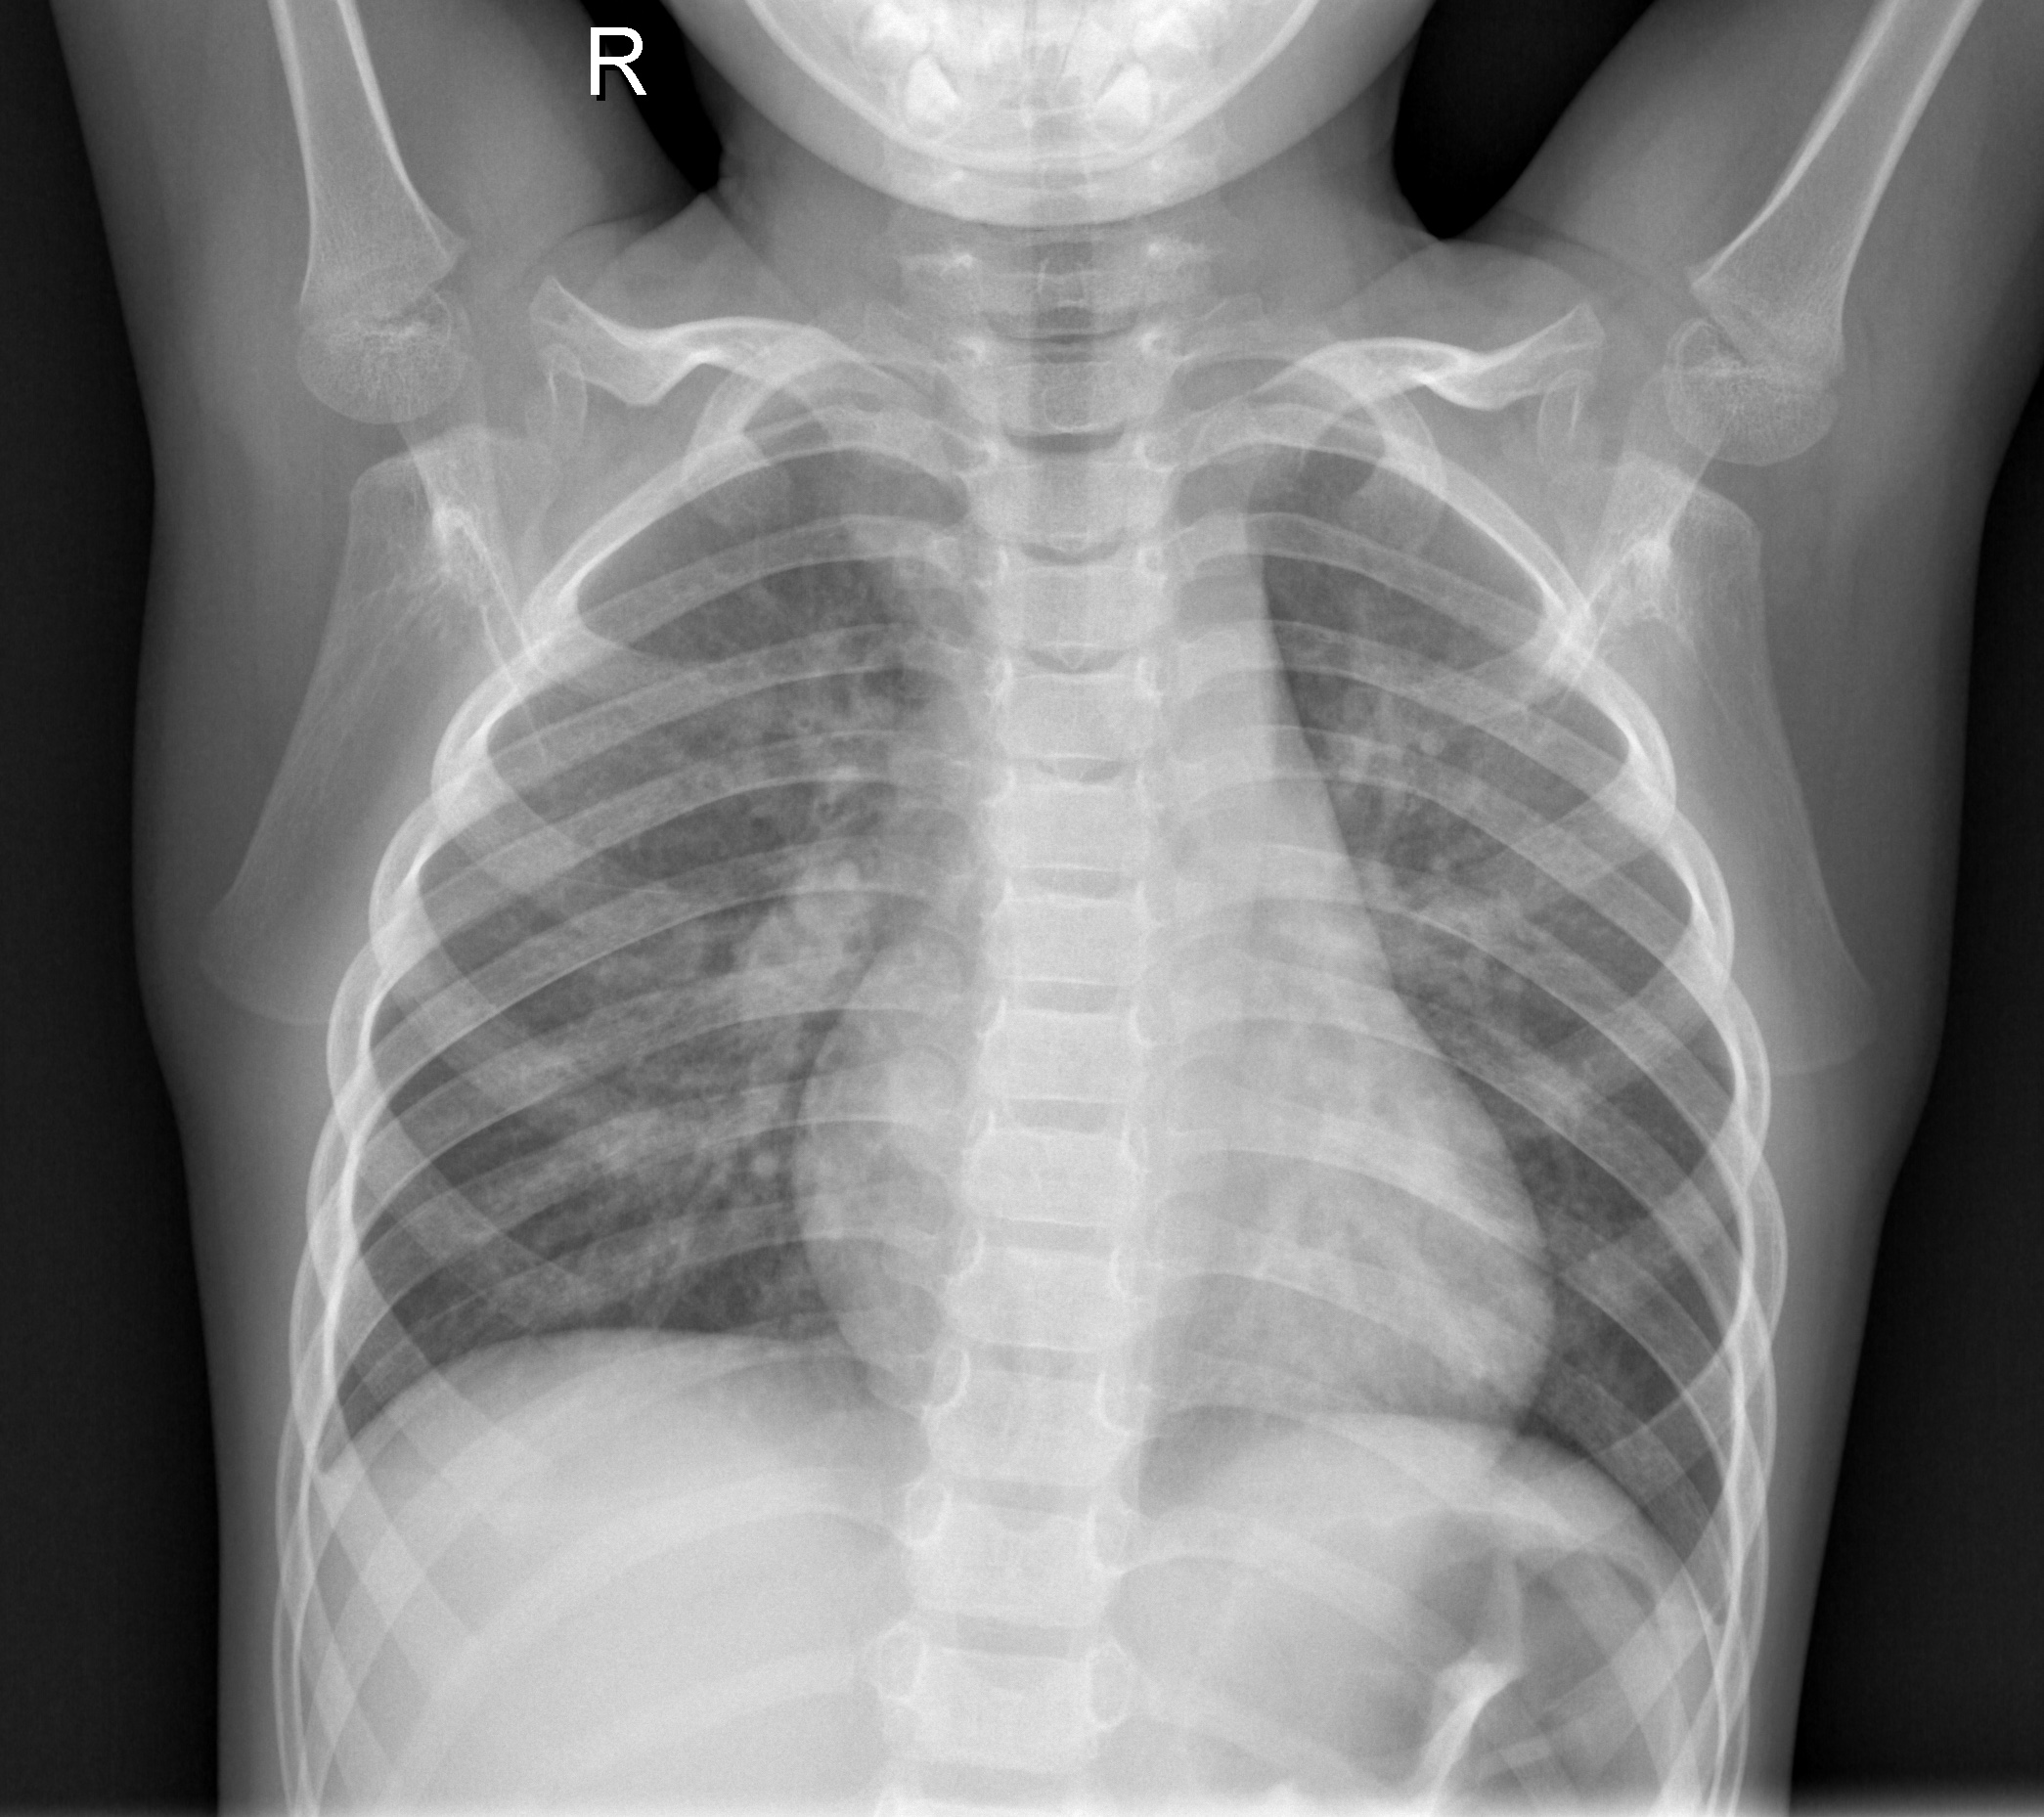

In [348]:
model_builder = keras.applications.xception.Xception
img_size = (224, 224)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d_12" 

# The local path to our target image
img_path = "/content/X_ray_data/MyDrive/X-ray_data/Data_4_before_aug/NORMAL/IM-0115-0001.jpeg"

display(Image(img_path))

In [349]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

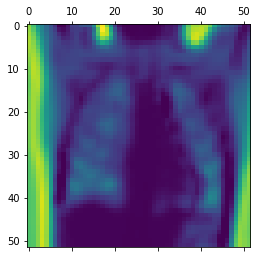

In [350]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
# model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [351]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.7):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


# save_and_display_gradcam(img_path, heatmap)

# Normal case

In [352]:
# img_path ="/content/X_ray_data/MyDrive/X-ray_data/Data_4_before_aug/NORMAL/IM-0115-0001.jpeg"
# save_and_display_gradcam(img_path, heatmap)

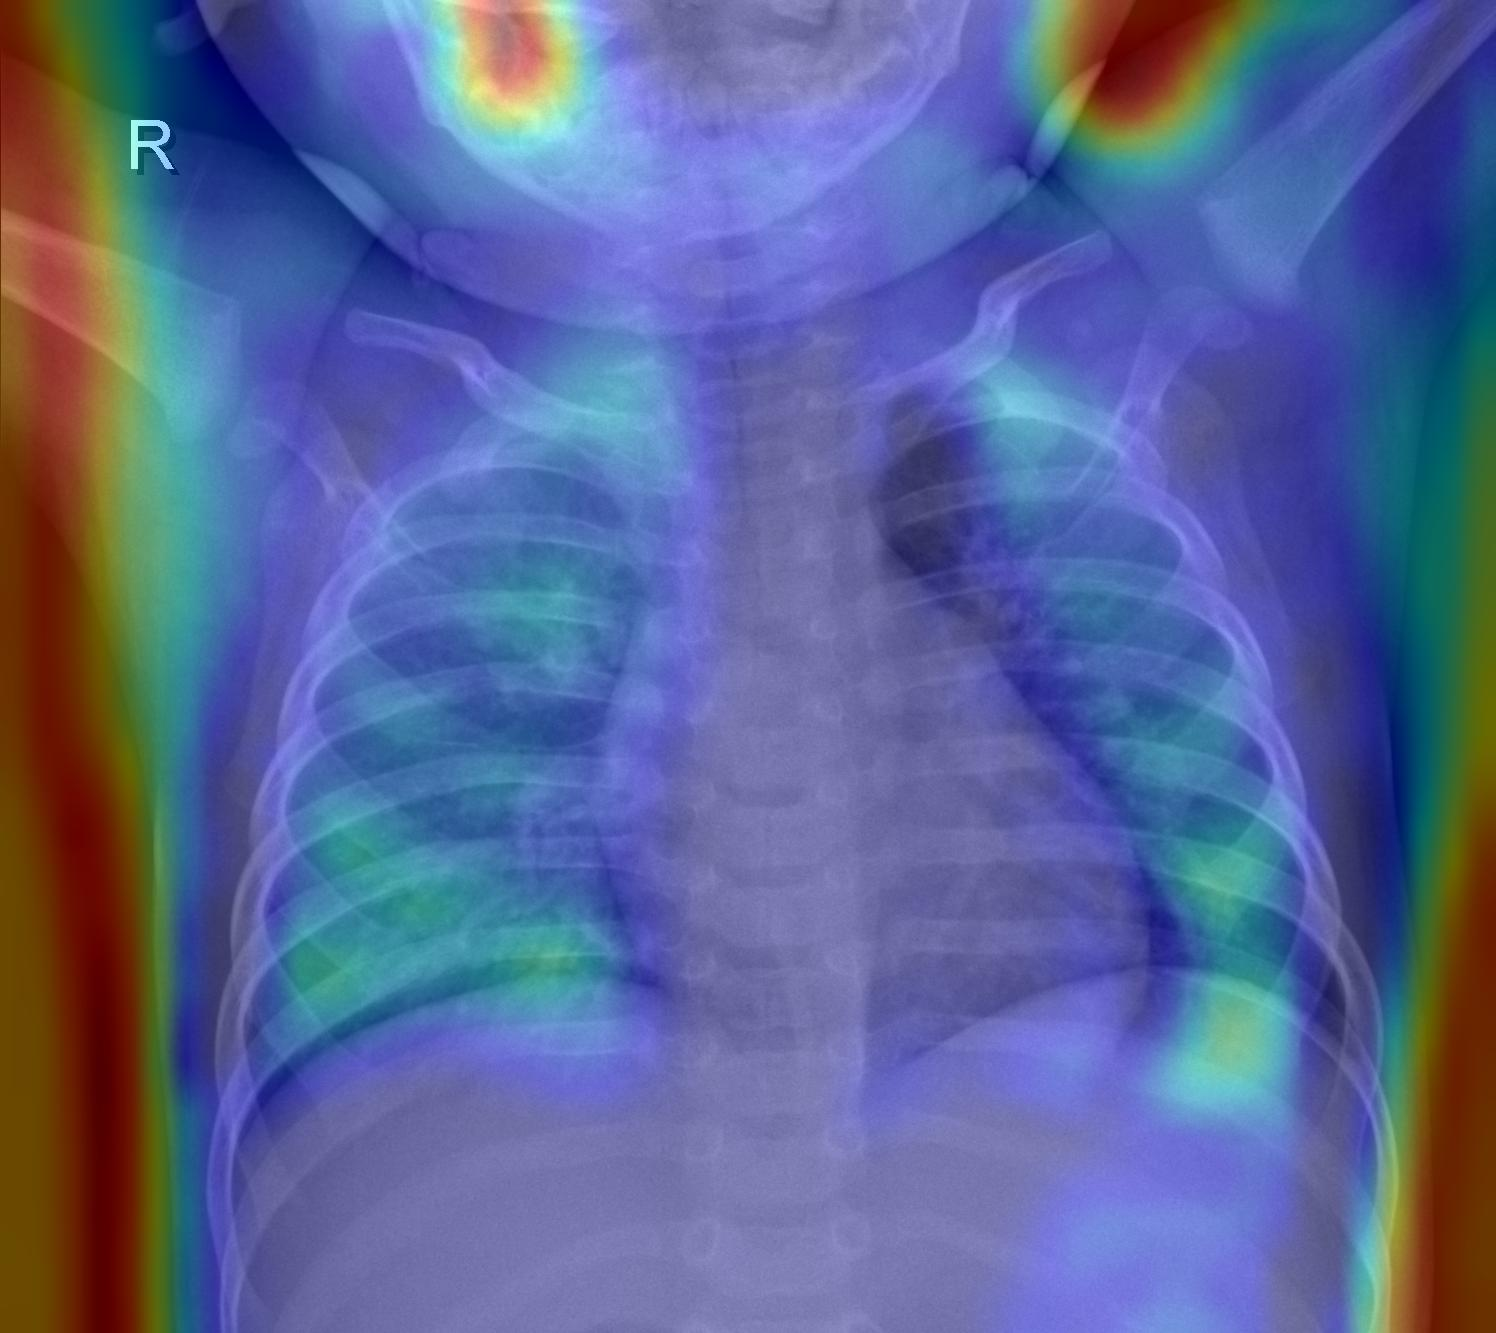

In [353]:
# IM-0302-0001.jpeg
# IM-0472-0001.jpeg
# IM-0593-0001.jpeg
# IM-0502-0001.jpeg
# IM-0540-0001.jpeg
img_path ="/content/X_ray_data/MyDrive/X-ray_data/Data_4_before_aug/NORMAL/IM-0540-0001.jpeg"
save_and_display_gradcam(img_path, heatmap)

# Covid case

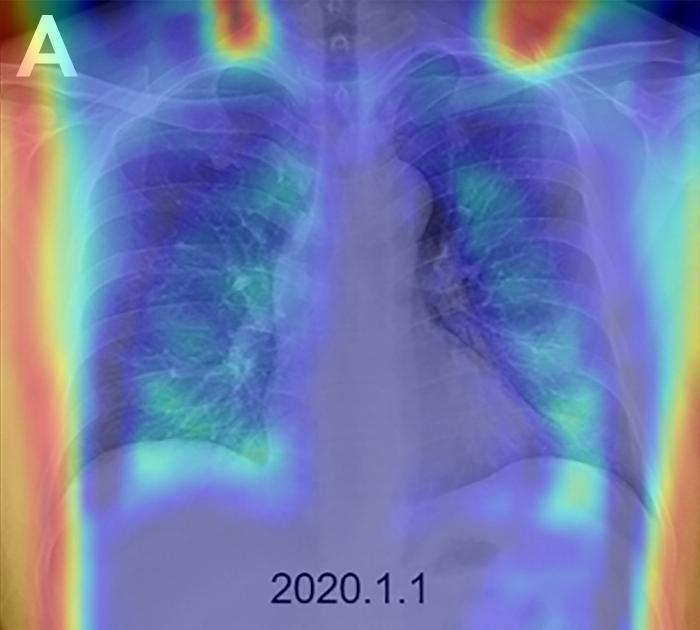

In [354]:
# 5f619d7e.jpg
# 4d98e1de.jpg
# nCoV-radiol.2020200269.fig1-day7.jpeg
# 82a78c13.jpg
# E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg
# 2-chest-filmc.jpg
# 48c4542c.jpg
# F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
# 1-s2.0-S2387020620301959-gr4_lrg-c.png
# f6575117.jpg
# 7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
# 7afaaccc.jpg
# yxppt-2020-02-19_00-51-27_287214-day8.jpg
# 2168a917.jpg
# c601f50d.jpg
# 80b5f00f.jpg

img_path ="/content/X_ray_data/MyDrive/X-ray_data/Data_4_before_aug/COVID/nCoV-radiol.2020200269.fig1-day7.jpeg"
save_and_display_gradcam(img_path, heatmap)

# Streptococcus

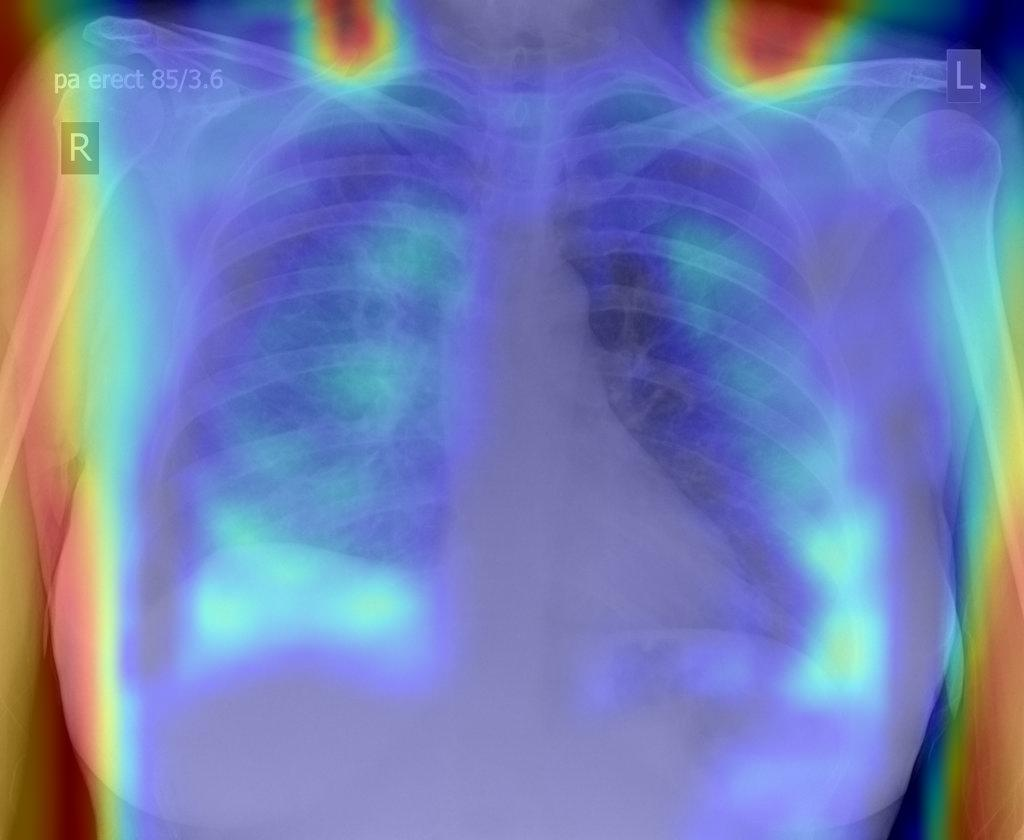

In [355]:
# 92d755fba55c3305419b5cac83fbf5_jumbo.jpg
# parapneumonic-effusion-1-PA.png
# pneumococcal-pneumonia-day35.jpg


img_path ="/content/X_ray_data/MyDrive/X-ray_data/Data_4_before_aug/Streptococcus/92d755fba55c3305419b5cac83fbf5_jumbo.jpg"
save_and_display_gradcam(img_path, heatmap)

# Pneumocystis

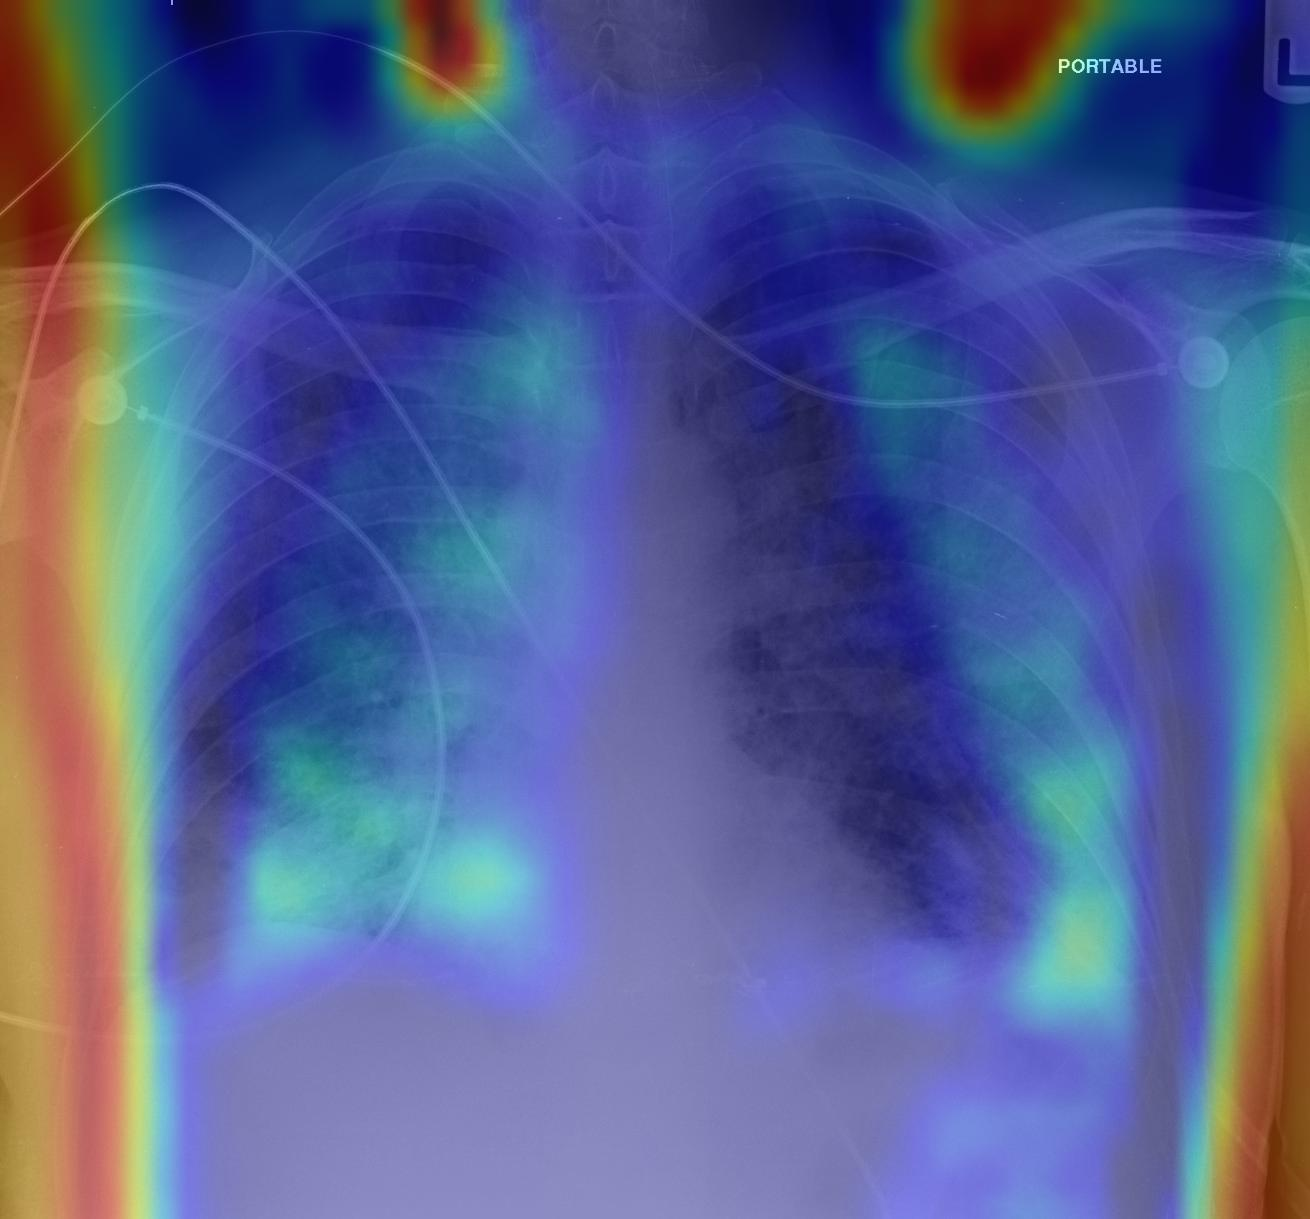

In [356]:
# 26eecee1e498237cc3ea3274b79ff0_jumbo.jpg
# 000003-6.jpg
# 000001-10.jpg
# 000001-1.png
# 487354e56da5b0363458d0297446f0_jumbo-1.jpeg
# 000001-8.jpg
# pneumocystis-carinii-pneumonia-1-PA.jpg
# 000002-5.jpg
# X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg
# 946b48f8564d681eb8950ea8a659e0_jumbo-1.jpeg
# pneumocystis-jirovecii-pneumonia-3-2.jpg
# pneumocystis-jirovecii-pneumonia-3-1.jpg
# pneumocystis-pneumonia-2-PA.png
# pneumocystis-jiroveci-pneumonia-4-PA.png
# pneumocystis-jirovecii-pneumonia-2.jpg
# pneumocystis-jirovecii-pneumonia-3-3.jpg
# pneumocystis-pneumonia-1.jpg
# pneumocystis-pneumonia-8.jpg


img_path ="/content/X_ray_data/MyDrive/X-ray_data/Data_4_before_aug/Pneumocystis/pneumocystis-pneumonia-8.jpg"
save_and_display_gradcam(img_path, heatmap)


# Applying the model on images before augmentation.

In [357]:
path_data = '/content/X_ray_data/MyDrive/X-ray_data/Data_4_before_aug'

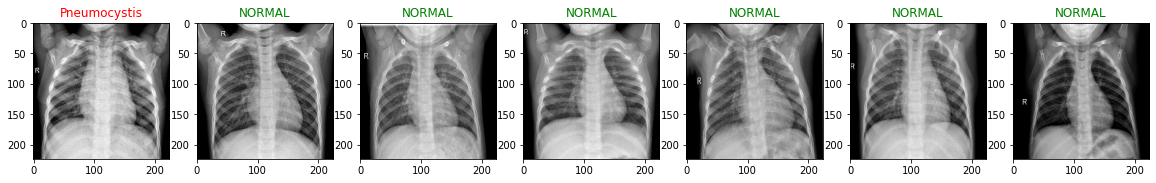

In [358]:
Normal_img_list = os.listdir(path_data+'/NORMAL/')
Normal_img_list = [i for i in Normal_img_list if i !='.DS_Store']
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Normal_img_list[0:7]):
    path_to_img = path_data+'/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)
    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='g')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')

plt.savefig("/content/X_ray_data/MyDrive/X-ray_data/plot_4C_Normal_before_Aug.png")

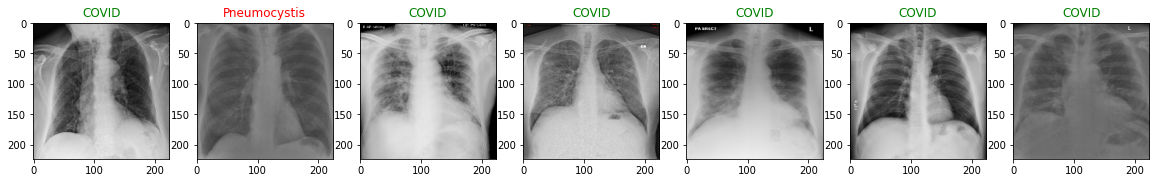

In [359]:
COVID_img_list = os.listdir(path_data+'/COVID/')
COVID_img_list = [i for i in COVID_img_list if i !='.DS_Store']

plt.figure(figsize=(20, 10)) 
for i, img in enumerate(COVID_img_list[0:7]):
    path_to_img = path_data+'/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)

    if prediction==0:
        plt.title("COVID", color='g')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')

plt.savefig("/content/X_ray_data/MyDrive/X-ray_data/plot_4C_COVID_before_Aug.png")

In [360]:
COVID_img_list[0:7]

['figure1-5e75d0940b71e1b702629659-98-right.jpeg',
 '5f619d7e.jpg',
 'ryct.2020200034.fig5-day7.jpeg',
 'covid-19-caso-70-1-PA.jpg',
 'ryct.2020200034.fig5-day0.jpeg',
 'covid-19-pneumonia-mild.JPG',
 '4d98e1de.jpg']

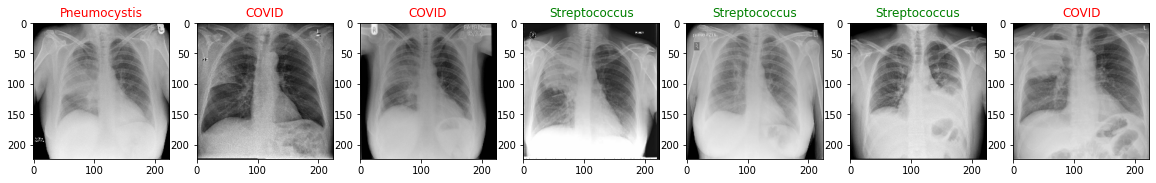

In [361]:
Streptococcus_img_list = os.listdir(path_data+'/Streptococcus/')
Streptococcus_img_list = [i for i in Streptococcus_img_list if i !='.DS_Store']
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Streptococcus_img_list[0:7]):
    path_to_img = path_data+'/Streptococcus/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)


    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='g')

plt.savefig("/content/X_ray_data/MyDrive/X-ray_data/plot_4C_Streptococcus_before_Aug.png")

In [362]:
Streptococcus_img_list[0:7]

['pneumococcal-pneumonia-day0.jpg',
 'right-upper-lobe-pneumonia-9-PA.jpg',
 '2fc8a7c61c76f13ee7f9306b44e792_jumbo.jpg',
 '000004.png',
 '92d755fba55c3305419b5cac83fbf5_jumbo.jpg',
 'parapneumonic-effusion-1-PA.png',
 'cavitating-pneumonia-4-day0-PA.jpg']

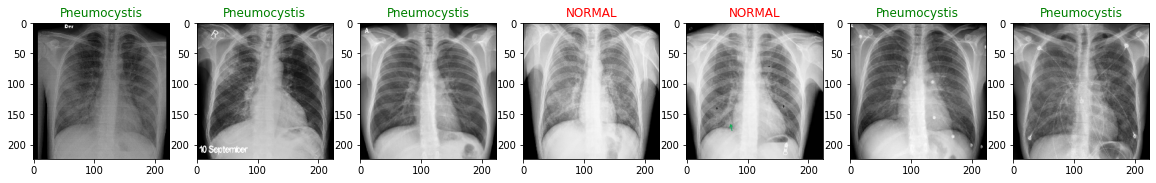

In [363]:
Pneumocystis_img_list = os.listdir(path_data+'/Pneumocystis/')
Pneumocystis_img_list = [i for i in Pneumocystis_img_list if i !='.DS_Store']
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Pneumocystis_img_list[0:7]):
    path_to_img = path_data+'/Pneumocystis/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)


    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='g')
    else:
        plt.title("Streptococcus", color='r')

plt.savefig("/content/X_ray_data/MyDrive/X-ray_data/plot_4C_Pneumocystis_before_Aug.png")

In [364]:
Pneumocystis_img_list[0:7]

['pneumocystis-jiroveci-pneumonia-2.png',
 '26eecee1e498237cc3ea3274b79ff0_jumbo.jpg',
 '000003-6.jpg',
 '000001-10.jpg',
 '000001-2.jpg',
 '000001-1.png',
 '487354e56da5b0363458d0297446f0_jumbo-1.jpeg']

In [365]:
NORMAL_img_list = os.listdir(path_data+'/NORMAL/')
NORMAL_img_list = [i for i in NORMAL_img_list if i !='.DS_Store']

# plt.figure(figsize=(20, 10))


estimations_for_NORMAL_data = []
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(NORMAL_img_list):
    path_to_img = path_data+'/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    # ax = plt.subplot(1, 7, i+1)
    # plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction[0])
    estimations_for_NORMAL_data.append(prediction[0])

<Figure size 1440x720 with 0 Axes>

In [366]:
COVID_img_list = os.listdir(path_data+'/COVID/')
COVID_img_list = [i for i in COVID_img_list if i !='.DS_Store']

# plt.figure(figsize=(20, 10))


estimations_for_COVID_data = []
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(COVID_img_list):
    path_to_img = path_data+'/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    # ax = plt.subplot(1, 7, i+1)
    # plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction[0])
    estimations_for_COVID_data.append(prediction[0])

<Figure size 1440x720 with 0 Axes>

In [367]:
Pneumocystis_img_list = os.listdir(path_data+'/Pneumocystis/')
Pneumocystis_img_list = [i for i in Pneumocystis_img_list if i !='.DS_Store']

# plt.figure(figsize=(20, 10))


estimations_for_Pneumocystis_data = []
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Pneumocystis_img_list):
    path_to_img = path_data+'/Pneumocystis/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    # ax = plt.subplot(1, 7, i+1)
    # plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction[0])
    estimations_for_Pneumocystis_data.append(prediction[0])

<Figure size 1440x720 with 0 Axes>

In [368]:
Streptococcus_img_list = os.listdir(path_data+'/Streptococcus/')
Streptococcus_img_list = [i for i in Streptococcus_img_list if i !='.DS_Store']

# plt.figure(figsize=(20, 10))


estimations_for_Streptococcus_data = []
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Streptococcus_img_list):
    path_to_img = path_data+'/Streptococcus/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    # ax = plt.subplot(1, 7, i+1)
    # plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction[0])
    estimations_for_Streptococcus_data.append(prediction[0])

<Figure size 1440x720 with 0 Axes>

In [369]:
estimations_for_COVID_data
estimations_for_normal_data
estimations_for_Pneumocystis_data
estimations_for_Streptococcus_data


values, counts_COVID = np.unique(estimations_for_COVID_data, return_counts=True)
values, counts_normal = np.unique(estimations_for_NORMAL_data, return_counts=True)
values, counts_Pneumocystis = np.unique(estimations_for_Pneumocystis_data, return_counts=True)
values, counts_Streptococcus = np.unique(estimations_for_Streptococcus_data, return_counts=True)

print(counts_COVID)
print(counts_normal)
print(counts_Pneumocystis)
print(counts_Streptococcus)

[115   8  62  11]
[  3 186   7]
[ 1  3 17]
[5 3 4]
